## Baggin 기법

In [ ]:
'''
랜덤포레스트는 Bagging 방식을 적용한 알고리즘
Bagging 방식으로 각자의 데이터를 샘플링해서 개별적으로 학습한 후 ,
여러 트리의 결과를 다수결 또는 평균으로 최종적인 예측 결과를 도출

Bagging = Bootstrap Aggrigation
사이킷런은 랜덤포레스트모델을 라이브러리로 제공
'''

In [15]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42,stratify=iris.target)

## RandomForest Model Generator

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

## Model Accuracy 측정하기
    1. 직접 측정
    2. 사용자 함수 정의해서 측정
    3. 라이브러리 이용(score,accuracy_score)
    4. Confusion Metrix

In [35]:
pred=rf.predict(X_test)
# 1. 
y_tuple=list(zip(y_test,pred))
y_tuple

[(0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 2),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1)]

In [48]:
# 2.
count=0
for a,b in y_tuple:
    if not a==b:
        count+=1
        print("unmatched : (y_test,pred)= (a,b)",(a,b))
(len(y_test)-count)/len(y_test)

unmatched : (y_test,pred)= (a,b) (2, 1)
unmatched : (y_test,pred)= (a,b) (2, 1)
unmatched : (y_test,pred)= (a,b) (1, 2)


0.9210526315789473

In [47]:
# 3.Accuracy_score
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test,pred)
accuracy

0.9210526315789473

### # 4. Counfusion Matrix

In [52]:
# 4.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 11]], dtype=int64)

## DataFrame Visuliization

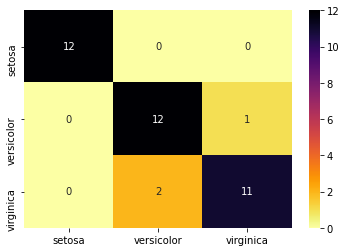

In [127]:
from pandas import DataFrame
df=DataFrame(confusion_matrix(y_test,pred),columns=iris.target_names,index=iris.target_names)
sns.heatmap(df,annot=True,cmap=plt.cm.inferno_r)

In [2]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred,pos_label=2)
plt.plot(tpr)
plt.plot(fpr)
plt.plot([0, 3], [0, 1], 'k--')

NameError: name 'y_test' is not defined

In [ ]:
챈님 천재^-^ 